In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
from pathlib import Path
DATA_PATH = Path('/kaggle/input/byu-locating-bacterial-flagellar-motors-2025')
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_labels_df = pd.read_csv(DATA_PATH / 'train_labels.csv')
train_labels_df.head(30)

,row_id,tomo_id,Motor axis 0,Motor axis 1,Motor axis 2,Array shape (axis 0),Array shape (axis 1),Array shape (axis 2),Voxel spacing,Number of motors
0,0,tomo_003acc,-1.0,-1.0,-1.0,500,1912,1847,6.5,0
1,1,tomo_00e047,169.0,546.0,603.0,300,959,928,15.6,1
2,2,tomo_00e463,235.0,403.0,137.0,500,924,956,19.7,6
3,3,tomo_00e463,243.0,363.0,153.0,500,924,956,19.7,6
4,4,tomo_00e463,222.0,379.0,144.0,500,924,956,19.7,6
5,5,tomo_00e463,225.0,262.0,628.0,500,924,956,19.7,6
6,6,tomo_00e463,225.0,241.0,643.0,500,924,956,19.7,6
7,7,tomo_00e463,231.0,289.0,632.0,500,924,956,19.7,6
8,8,tomo_01a877,147.0,638.0,286.0,300,960,928,13.1,1
9,9,tomo_02862f,101.0,351.0,120.0,300,959,928,15.6,1


tomo_00e047
(959, 928, 3)


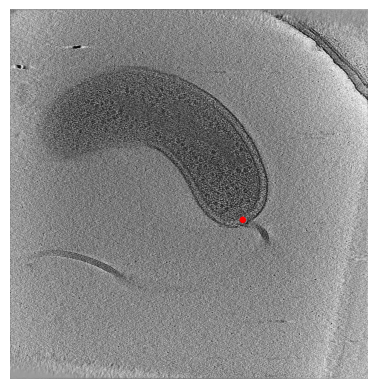

tomo_00e463
(924, 956, 3)


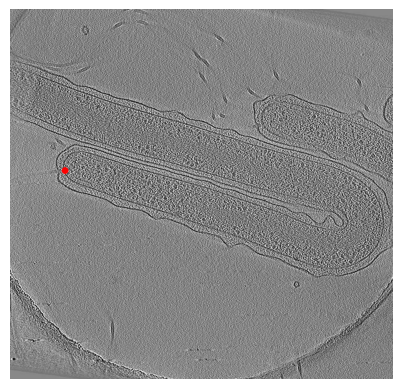

tomo_00e463
(924, 956, 3)


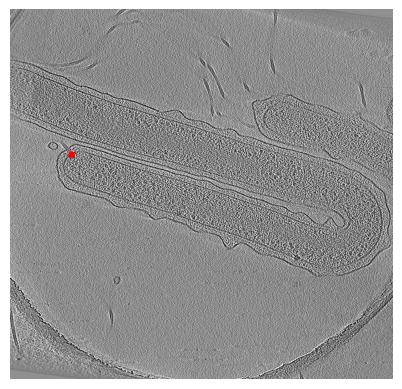

tomo_00e463
(924, 956, 3)


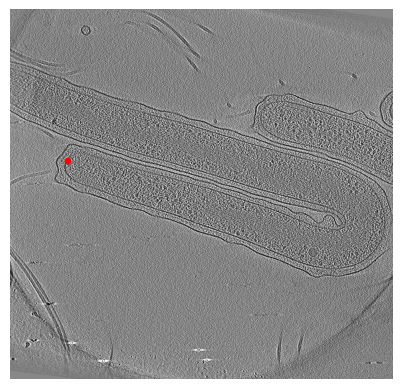

tomo_00e463
(924, 956, 3)


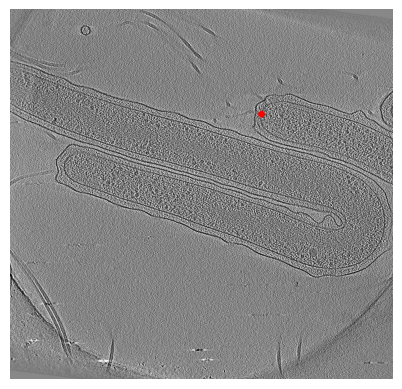

tomo_00e463
(924, 956, 3)


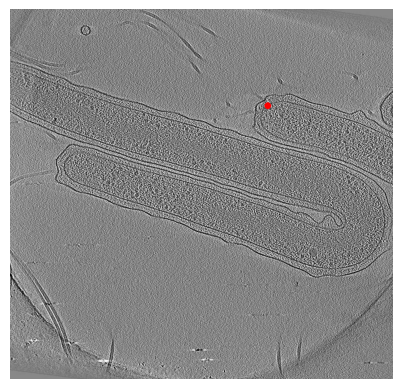

tomo_00e463
(924, 956, 3)


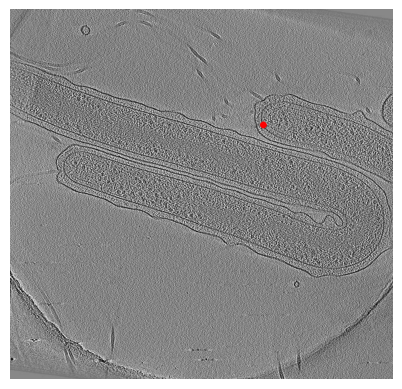

tomo_01a877
(960, 928, 3)


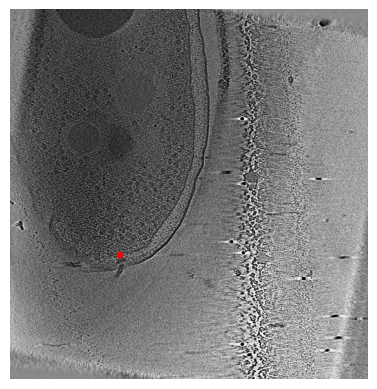

tomo_02862f
(959, 928, 3)


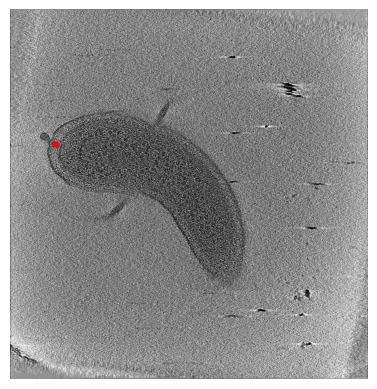

tomo_033ebe
(960, 928, 3)


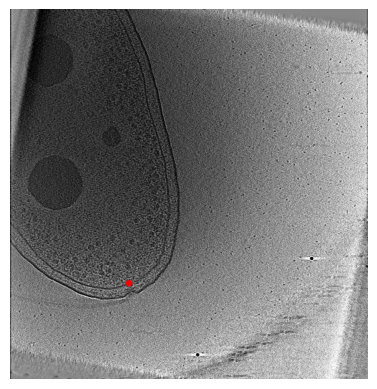

In [3]:
train_labels_pos_df = train_labels_df[train_labels_df['Motor axis 0'] != -1]
for i, row in train_labels_pos_df.iterrows():
    img = Image.open(DATA_PATH / f'train/{row["tomo_id"]}/slice_{int(row["Motor axis 0"]):04d}.jpg').convert("RGB")
    draw = ImageDraw.Draw(img)

    # Define dot center and radius
    x, y = row['Motor axis 2'], row['Motor axis 1']   # position
    r = 8            # radius
    
    # Draw filled circle (dot)
    draw.ellipse((x - r, y - r, x + r, y + r), fill='red')
    
    img = np.array(img)
    print(row['tomo_id'])
    print(img.shape)
    plt.imshow(img)
    plt.axis('off')
    plt.show() 
    if i > 10:
        break
#img = Image.open( DATA_PATH / f'train/tomo_003acc/slice_{}.jpg')
